<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/Assignment4_KNN_PineappleTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="color:red;font-weight: bold;font-size:40px">Assignment 4 - KNN</span>

Welcome to the KNN Project! This project is similar to the lecture, with the main difference being that you’ll work with a new dataset.

# Retrieving the data

a) Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

b) Read the KNN_Project_Data CSV file and store it as a variable.

In [ ]:
df = pd.read_csv('KNN_Project_Data')

c) Display the first few rows of the customers dataset and review its info() and describe() methods.

In [ ]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [ ]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# Feature Scaling

1- Standardize the input features to ensure they are on the same scale, and create a new DataFrame to store the standardized features.

Display the first few rows of the DataFrame containing the standardized features.

Finally, run the describe() method.(30 pts)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [ ]:
scaled_feats = scaler.fit_transform(df.drop('TARGET CLASS', axis = 1))

# Training and testing the model

2- Split the data into training and testing sets using test_size=0.3 and random_state=101 to ensure reproducibility. (5 pts)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_feat = pd.DataFrame(scaled_feats, columns = df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [ ]:
X = df_feat
y = df['TARGET CLASS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 101)

3 - Create an instance of the KNeighborsClassifier model with k=1, and train (fit) it using the training data. (5 pts)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions

4- Use the trained model to make predictions on the test data. (5 pts)

In [ ]:
predictions = knn.predict(X_test)

# Evaluating the model

5- Generate the classification report. (5 pts)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



6- Generate a DataFrame for the confusion matrix. (5 pts)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [ ]:
df_confusion = pd.DataFrame(
    [[tn, fp], [fn, tp]],
    columns = ["Predicted Negative", "Predicted Positive"],
    index = ["Actual Negative", "Actual Positive"]
)

In [ ]:
df_confusion

,Predicted Negative,Predicted Positive
Actual Negative,109,43
Actual Positive,41,107


7- Calculate accuracy and misclassification rate. (5 pts)

In [ ]:
accuracyScore = accuracy_score(y_test, predictions)
error_rate = 1-accuracyScore

print('Accuracy: ', np.round(accuracyScore*100,2))
print('Error rate: ', np.round(error_rate*100,2))

Accuracy:  72.0
Error rate:  28.0


# Elbow method

8- Use the elbow method to determine the optimal K value.

Then, print the classification report, confusion matrix, accuracy, and misclassification rate for the optimal K value. (40 pts)

In [ ]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  predictions_i = knn.predict(X_test)
  error_rate.append(1-accuracy_score(y_test, predictions_i))

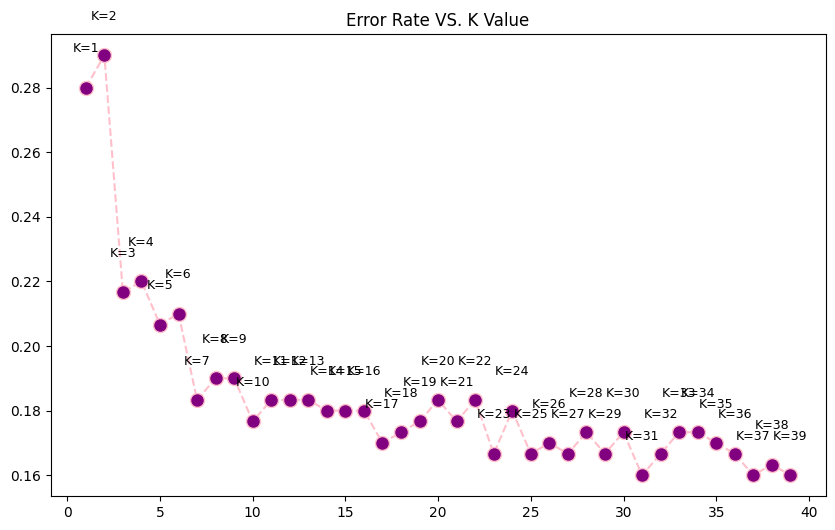

In [ ]:
plt.figure(figsize=(10,6))
x_values = range(1,40)
plt.plot(x_values, error_rate, color='pink', linestyle='dashed', marker='o', markerfacecolor='purple', markersize=10)
plt.title('Error Rate VS. K Value')

for x, y in zip(x_values, error_rate):
    plt.text(x, y + 0.01, f'K={x}', fontsize=9, ha='center', va='bottom')

The best k value according to the elbow method is 17

With the new value of K we have these results

In [ ]:
knn = KNeighborsClassifier(17)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
df_confusion = pd.DataFrame(
    [[tn, fp], [fn, tp]],
    columns = ["Predicted Negative", "Predicted Positive"],
    index = ["Actual Negative", "Actual Positive"]
)

df_confusion

accuracyScore = accuracy_score(y_test, predictions)
error_rate = 1-accuracyScore

print('Accuracy: ', np.round(accuracyScore*100,2))
print('Error rate: ', np.round(error_rate*100,2))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Accuracy:  83.0
Error rate:  17.0


If we use a higher value the difference is slight.

In [ ]:
knn = KNeighborsClassifier(31)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
df_confusion = pd.DataFrame(
    [[tn, fp], [fn, tp]],
    columns = ["Predicted Negative", "Predicted Positive"],
    index = ["Actual Negative", "Actual Positive"]
)

df_confusion

accuracyScore = accuracy_score(y_test, predictions)
error_rate = 1-accuracyScore

print('Accuracy: ', np.round(accuracyScore*100,2))
print('Error rate: ', np.round(error_rate*100,2))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Accuracy:  84.0
Error rate:  16.0


We can conclude that 17 is the ideal K Value since it's more efficient and increasing the value of K doesn't make much of a difference. In addition to having a higher cost.